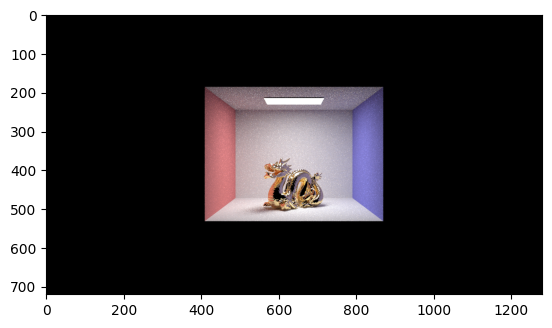

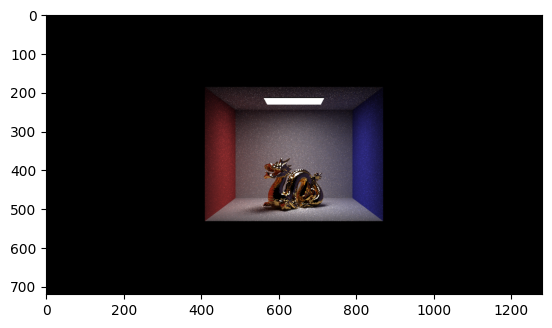

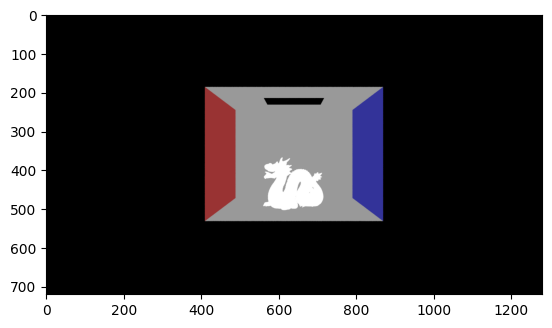

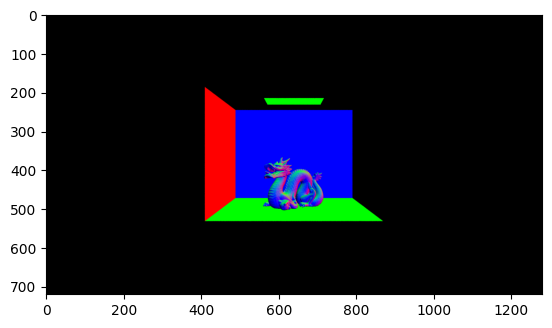

In [ ]:
from pathlib import Path
import numpy as np
import struct


def read_pfm(filename):
    with open(filename, 'rb') as pfm_file:

        line1, line2, line3 = (pfm_file.readline().decode('latin-1').strip() for _ in range(3))
        assert line1 in ('PF', 'Pf')

        channels = 3 if "PF" in line1 else 1
        width, height = (int(s) for s in line2.split())
        scale_endianess = float(line3)
        bigendian = scale_endianess > 0
        scale = abs(scale_endianess)

        buffer = pfm_file.read()
        samples = width * height * channels
        assert len(buffer) == samples * 4

        fmt = f'{"<>"[bigendian]}{samples}f'
        decoded = struct.unpack(fmt, buffer)
        shape = (height, width, 3) if channels == 3 else (height, width)
        return np.flipud(np.reshape(decoded, shape)) * scale


import matplotlib.pyplot as plt
image = read_pfm('outfile.png.ldr.pfm')
plt.imshow(image)
plt.show()
image = read_pfm('outfile.png.hdr.pfm')
plt.imshow(image)
plt.show()
image = read_pfm('outfile.png.albedo.hdr.pfm')
plt.imshow(image)
plt.show()
image = read_pfm('outfile.png.normal.hdr.pfm')
plt.imshow(image)
plt.show()